# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Analyze ACT and SAT score data in order to determine recommendations for improving participation rates. 

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [431]:
act17 = pd.read_csv('../data/act_2017.csv')
sat17 = pd.read_csv('../data/sat_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [432]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [433]:
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [434]:
sat17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [435]:
act17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The data provides the participation rate in each state as and the average score in subject category for each state. Scores for the SAT and ACT are scored on a different scale. SAT only has two subject categories while the ACT has four.

#### 4a. Does the data look complete? 

Answer: Yes. All 50 states and the district of columbia are accounted for and there are no empty cells.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Some of the minimum values look suspicious. The minimum value for the math SAT score is 52, which is far below the first quartile. Ths same can be said for the minimum science ACT score of 2.3, which is also far below the first quartile. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [436]:
sat17[sat17['Math'] == sat17['Math'].min()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [437]:
sat17.loc[20, 'Math'] = 524  #correction can be found in https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/

In [438]:
act17[act17['Science'] == act17['Science'].min()]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [439]:
act17.loc[21, 'Science'] = 23.1 #correction can be found in https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

#### 5. What are your data types? 
Display the data types of each feature. 

In [440]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [441]:
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation column for both tests are strings because of the "%" sign in each entry. Composite should be a numeric type but is a string. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [442]:
act17['Participation'] = act17['Participation'].str.replace('%', '').astype(int)
sat17['Participation'] = sat17['Participation'].str.replace('%', '').astype(int)

- Fix any individual values preventing other columns from being the appropriate type.

In [443]:
act17.loc[51, 'Composite'] = 20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [444]:
act17['Composite'] = act17['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [445]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int64  
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


In [446]:
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     int64 
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [447]:
act17.columns = act17.columns.str.lower()
sat17.columns = sat17.columns.str.lower()

In [448]:
act17.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [449]:
sat17.columns

Index(['state', 'participation', 'evidence-based reading and writing', 'math',
       'total'],
      dtype='object')

In [450]:
act17.rename(columns = {'participation':'act_participation', 'english' : 'act_english', 'math':'act_math',\
                       'reading':'act_reading', 'science':'act_science', 'composite':'act_composite'}, inplace = True)
sat17.rename(columns = {'participation':'sat_participation', 'evidence-based reading and writing':'sat_ebrw',\
                        'math':'sat_math', 'total':'sat_total'}, inplace = True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Column|Type|Description|
|---|---|---|
|state|object|name of the state|
|act17_participation|int|ACT participation percentage in 2017|
|act17_english |float| ACT english score in 2017|
|act17_math |float | ACT math score in 2017|
|act17_reading |float | ACT reading score in 2017|
|act17_science |float | ACT science score in 2017|
|act17_composite |float |ACT composite score in 2017|
|sat17_participation |int |SAT participation percentage in 2017|
|sat17_ebrw|int| SAT evidence-based reading and writing score in 2017|
|sat17_math|int| SAT math score|
|sat17_total|int| SAT total score |
|act18_participation|int| SAT participation in 2018|
|act18_composite|float| ACT composite score in 2018|
|sat18_participation|int| ACT participation in 2018 |
|sat18_ebrw|int| SAT evidence-based readning and writing score in 2018|
|sat18_math|int| SAT math score in 2018|
|sat18_total|int| SAT total score in 2018|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [451]:
act17 = act17.drop(index = 0) #dropping the "National" row

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [452]:
st_tests = pd.merge(act17, sat17, on = 'state') #st_tests = standardized tests

In [453]:
st_tests.state = st_tests.state.str.lower()

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [454]:
st_tests.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [455]:
act18 = pd.read_csv('../data/act_2018.csv')
sat18 = pd.read_csv('../data/sat_2018.csv')

In [456]:
sat18['Participation'] = sat18['Participation'].str.replace('%','').astype(int)

In [457]:
act18['Participation'] = act18['Participation'].str.replace('%','').astype(int)

In [458]:
act18.describe()

,Participation,Composite
count,52.000000,52.000000
mean,60.673077,21.544231
std,34.545634,2.119417
min,7.000000,17.700000
25%,27.000000,19.975000
50%,65.500000,21.300000
75%,100.000000,23.725000
max,100.000000,25.600000


In [459]:
act18 = act18.drop(index = 19)

In [460]:
act18.columns = act18.columns.str.lower()

In [461]:
sat18.columns = sat18.columns.str.lower()

In [462]:
def add_prefix(string, columns): #adds a prefix to every column except state
    new_cols = []
    for column in columns:
        if column != 'state':
            new_cols.append(string + '_' + column)
        else:
            new_cols.append(column)
    return new_cols

In [463]:
act18.columns = add_prefix('act18', list(act18.columns))
sat18.columns = add_prefix('sat18', list(sat18.columns))

In [464]:
sat18.rename(columns = {'sat18_evidence-based reading and writing':'sat18_ebrw'}, inplace = True)

In [465]:
sat18.state = sat18.state.str.lower()
act18.state = act18.state.str.lower()

In [466]:
st_tests18 = pd.merge(act18, sat18, on='state')

In [467]:
st_tests18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   act18_participation  51 non-null     int64  
 2   act18_composite      51 non-null     float64
 3   sat18_participation  51 non-null     int64  
 4   sat18_ebrw           51 non-null     int64  
 5   sat18_math           51 non-null     int64  
 6   sat18_total          51 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 3.2+ KB


In [468]:
col_renames = {
    'act_participation':'act17_participation',
    'act_english' : 'act17_english',
    'act_math' : 'act17_math',
    'act_reading' : 'act17_reading',
    'act_science' : 'act17_science',
    'act_composite' : 'act17_composite',
    'sat_participation' : 'sat17_participation',
    'sat_ebrw' : 'sat17_ebrw',
    'sat_math' : 'sat17_math',
    'sat_total' : 'sat17_total'
}
st_tests.rename(columns = col_renames, inplace=True)


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [469]:
st_tests1718 = pd.merge(st_tests, st_tests18, on='state')

In [470]:
st_tests1718.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [471]:
st_tests1718.describe()

,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat17_participation,sat17_ebrw,sat17_math,sat17_total,act18_participation,act18_composite,sat18_participation,sat18_ebrw,sat18_math,sat18_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.449020,21.519608,39.803922,569.117647,556.882353,1126.098039,61.725490,21.496078,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.737397,2.020695,35.276632,45.666901,47.121395,92.494812,34.037085,2.111583,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.150000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.650000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [472]:
def calculate_std(series):
    summation = 0
    mean = series.mean()
    for element in series:
        summation += (element - mean)**2
    return np.sqrt(summation/len(series))

In [473]:
st_tests1718.iloc[:, 1:].apply(calculate_std, axis = 0)

act17_participation    31.824176
act17_english           2.330488
act17_math              1.962462
act17_reading           2.046903
act17_science           1.720280
act17_composite         2.000786
sat17_participation    34.929071
sat17_ebrw             45.216970
sat17_math             46.657134
sat17_total            91.583511
act18_participation    33.701736
act18_composite         2.090779
sat18_participation    36.946619
sat18_ebrw             47.034610
sat18_math             47.301946
sat18_total            93.227424
dtype: float64

In [474]:
st_tests1718.std()

act17_participation    32.140842
act17_english           2.353677
act17_math              1.981989
act17_reading           2.067271
act17_science           1.737397
act17_composite         2.020695
sat17_participation    35.276632
sat17_ebrw             45.666901
sat17_math             47.121395
sat17_total            92.494812
act18_participation    34.037085
act18_composite         2.111583
sat18_participation    37.314256
sat18_ebrw             47.502627
sat18_math             47.772623
sat18_total            94.155083
dtype: float64

The standard deviation calculations from my custom function is different from the bult-in function because the built-in function uses the (n-1) variant of the standard deviation formula.

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [475]:
st_tests1718.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   act17_participation  51 non-null     int64  
 1   act17_english        51 non-null     float64
 2   act17_math           51 non-null     float64
 3   act17_reading        51 non-null     float64
 4   act17_science        51 non-null     float64
 5   act17_composite      51 non-null     float64
 6   sat17_participation  51 non-null     int64  
 7   sat17_ebrw           51 non-null     int64  
 8   sat17_math           51 non-null     int64  
 9   sat17_total          51 non-null     int64  
 10  act18_participation  51 non-null     int64  
 11  act18_composite      51 non-null     float64
 12  sat18_participation  51 non-null     int64  
 13  sat18_ebrw           51 non-null     int64  
 14  sat18_math           51 non-null     int64  
 15  sat18_total          51 non-null     int64

In [476]:
{column : calculate_std(st_tests1718[column]) for column in st_tests1718.columns[1:]}

{'act17_participation': 31.824175751231806,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 1.7202795656314875,
 'act17_composite': 2.000786081581989,
 'sat17_participation': 34.92907076664508,
 'sat17_ebrw': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act18_participation': 33.70173582041031,
 'act18_composite': 2.090779082141178,
 'sat18_participation': 36.946619223539415,
 'sat18_ebrw': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

No, becuase the formula given is slightly different than the one used by the built-in function, which uses n-1 instead of n.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [477]:
st_tests1718[['state', 'act17_participation', 'act18_participation', 'act17_composite', 'act18_composite']].sort_values('act17_participation').head()

,state,act17_participation,act18_participation,act17_composite,act18_composite
19,maine,8,7,24.3,24.0
29,new hampshire,18,16,25.5,25.1
7,delaware,18,17,24.1,23.8
39,rhode island,21,15,24.0,24.2
38,pennsylvania,23,20,23.7,23.5


__States that have low participation in the ACT in 2017 also had low participation in 2018 as well. The average composite scores are well above the national median (~21) for these states. This is interesting because it's unclear why lower participation rates would correlate to higher scores.__

In [478]:
st = st_tests1718 #dataframe is a bit too long so I copied it over to one with a shorter name

In [479]:
st[st['act17_participation'] == 100][ ['state', 'act17_participation', 'act17_composite'] ]

,state,act17_participation,act17_composite
0,alabama,100,19.2
3,arkansas,100,19.4
5,colorado,100,20.8
17,kentucky,100,20.0
18,louisiana,100,19.5
23,minnesota,100,21.5
24,mississippi,100,18.6
25,missouri,100,20.4
26,montana,100,20.3
28,nevada,100,17.8


**States with the highest participation rate in the ACT generally have average scores lower than the median.**

In [480]:
cols = ['state', 'sat17_participation', 'sat17_total', 'act17_participation']
st_tests1718[cols].sort_values('sat17_participation').head(10)

,state,sat17_participation,sat17_total,act17_participation
34,north dakota,2,1256,98
24,mississippi,2,1242,100
15,iowa,2,1275,67
25,missouri,3,1271,100
44,utah,3,1238,100
41,south dakota,3,1216,80
27,nebraska,3,1253,84
49,wisconsin,3,1291,100
23,minnesota,3,1295,100
50,wyoming,3,1230,100


**States that have low participation in the SAT in 2017 typically have high participation rates in the ACT in 2017. This makes sense, as only one of these tests is required for entry into college.**

In [481]:
cols = ['state', 'sat17_participation', 'sat17_total', 'act17_participation']
st_tests1718[cols].sort_values('sat17_participation', ascending = False).head(10)

,state,sat17_participation,sat17_total,act17_participation
8,district of columbia,100,950,32
22,michigan,100,1005,29
6,connecticut,100,1041,31
7,delaware,100,996,18
29,new hampshire,96,1052,18
19,maine,95,1012,8
12,idaho,93,1005,38
9,florida,83,1017,73
21,massachusetts,76,1107,29
39,rhode island,71,1062,21


**States that have a high participation rate in the SAT have a somewhat lower participation rate in the ACT but not as severe. States with high participation rates in the SAT score slightly below the average (~1100).**

In [482]:
cols = ['state', 'act17_composite', 'act18_composite']
st[cols].sort_values('act17_composite').head()

,state,act17_composite,act18_composite
28,nevada,17.8,17.7
24,mississippi,18.6,18.6
40,south carolina,18.7,18.3
11,hawaii,19.0,18.9
33,north carolina,19.1,19.1


In [483]:
st[cols].sort_values('act17_composite').tail()

,state,act17_composite,act18_composite
8,district of columbia,24.2,23.6
19,maine,24.3,24.0
6,connecticut,25.2,25.6
21,massachusetts,25.4,25.5
29,new hampshire,25.5,25.1


**Average scores in the ACT for each state did not change much from 2017 to 2018. The top scores in the ACT come from the east cast.**

In [484]:
cols = ['state', 'sat17_total', 'sat18_total']
st[cols].sort_values('sat17_total').head()

,state,sat17_total,sat18_total
8,district of columbia,950,977
7,delaware,996,998
12,idaho,1005,1001
22,michigan,1005,1011
19,maine,1012,1013


In [485]:
st[cols].sort_values('sat17_total').tail()

,state,sat17_total,sat18_total
16,kansas,1260,1265
25,missouri,1271,1262
15,iowa,1275,1265
49,wisconsin,1291,1294
23,minnesota,1295,1298


**States that typically do well on the SAT in 2017 also did well in 2018. I somewhat expected the states with the best scores in the ACT to do well in the SAT as well. This is not true. The best SAT scores typically come from the midwest. This is interesting. Why are the best ACT scores from the Midwest?**

In [638]:
act_bool = st['act17_participation'] > 50
sat_bool = st['sat17_participation'] > 50
cols = ['state', 'act17_participation', 'sat17_participation']
st[act_bool & sat_bool][cols]

,state,act17_participation,sat17_participation
9,florida,73,83
10,georgia,55,61
11,hawaii,90,55


**Only three states have above 50% participation in both tests in 2017.**

In [487]:
act_bool = st['act18_participation'] > 50
sat_bool = st['sat18_participation'] > 50
cols = ['state', 'act18_participation', 'sat18_participation']
st[act_bool & sat_bool][cols]

,state,act18_participation,sat18_participation
9,florida,66,56
10,georgia,53,70
11,hawaii,89,56
33,north carolina,100,52
40,south carolina,100,55


**Same three states have above 50% in 2018 with the addition of the carolinas. Most of these states are in the south with the exception of hawaii**

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

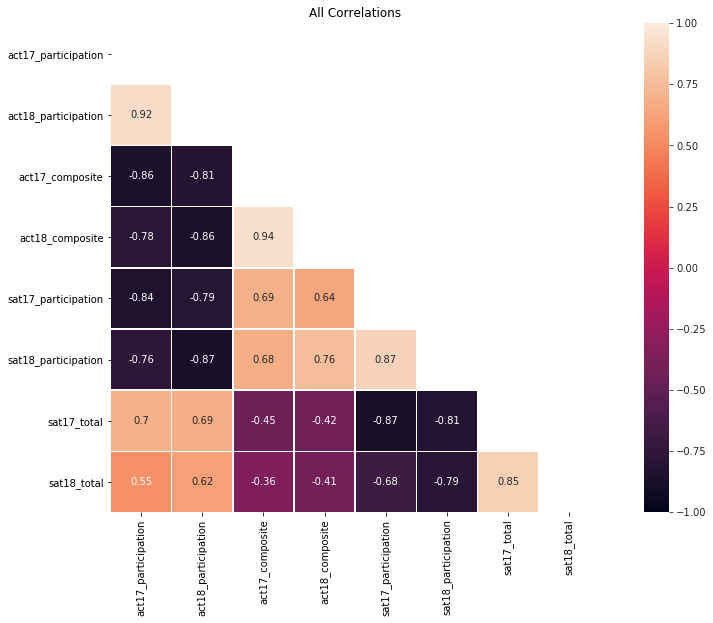

In [488]:
import seaborn as sns

plt.figure(figsize = (16,9))
plt.title('All Correlations')

cols = ['act17_participation', 'act18_participation', 'act17_composite', 'act18_composite',
        'sat17_participation', 'sat18_participation', 'sat17_total', 'sat18_total']
corr = st[cols].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

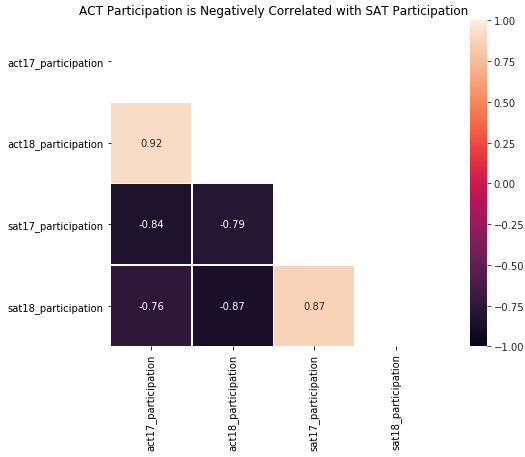

In [489]:
plt.figure(figsize = (12,6))
plt.title('ACT Participation is Negatively Correlated with SAT Participation')

cols = ['act17_participation', 'act18_participation',
        'sat17_participation', 'sat18_participation']
corr = st[cols].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

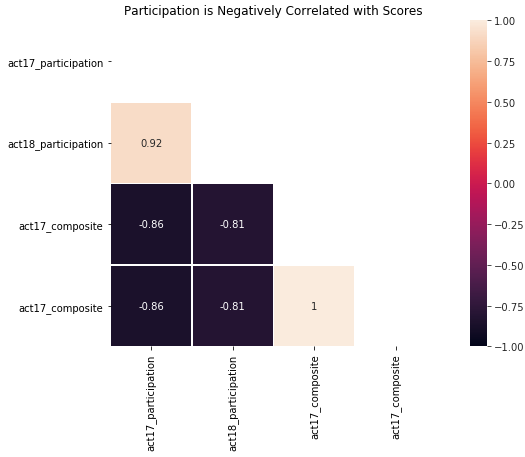

In [490]:
plt.figure(figsize = (12,6))
plt.title('Participation is Negatively Correlated with Scores')

cols = ['act17_participation', 'act18_participation',
        'act17_composite', 'act17_composite']
corr = st[cols].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

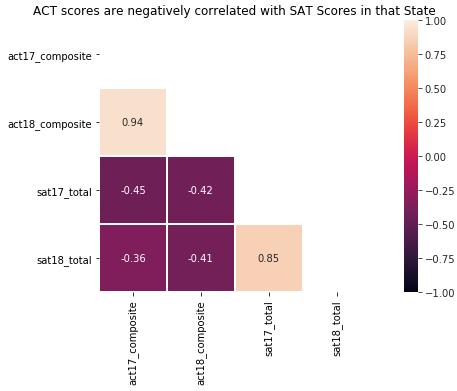

In [491]:
plt.figure(figsize = (12,5))
plt.title('ACT scores are negatively correlated with SAT Scores in that State')

cols = ['act17_composite', 'act18_composite',
        'sat17_total', 'sat18_total']
corr = st[cols].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [589]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharey = True, sharex = True, figsize=(13,8)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].title.set_text(list_of_titles[i])
        ax[i].tick_params(axis = 'both', reset = True)
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].axvline(x=st[list_of_columns[i]].median(), color = 'orange')


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

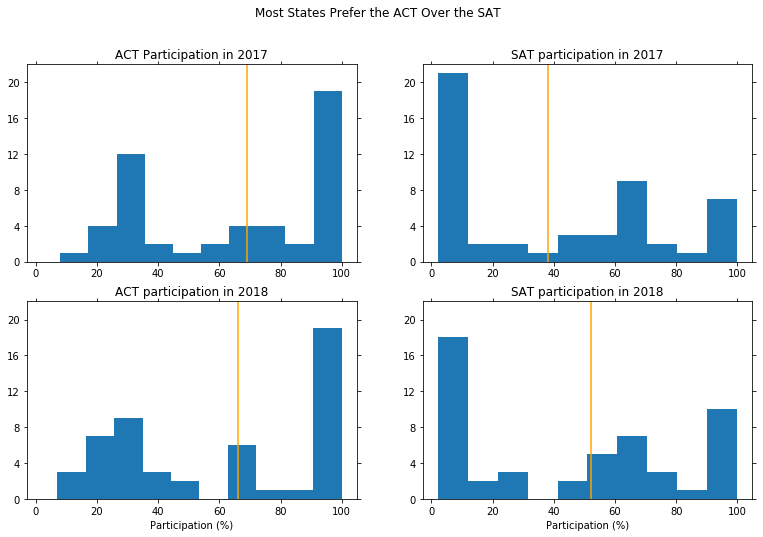

In [590]:
cols = ['act17_participation', 'sat17_participation', 'act18_participation', 'sat18_participation']
titles = ['ACT Participation in 2017', 'SAT participation in 2017','ACT participation in 2018', 'SAT participation in 2018']
xlabels = ['','','Participation (%)','Participation (%)']
subplot_histograms(st, cols, titles, xlabels)
plt.yticks(list(range(0,21,4)))
plt.suptitle('Most States Prefer the ACT Over the SAT');

**Many states seem to prefer the ACT over the SAT. The distribution for the participation levels haven't changed much for either test from 2017 to 2018.**

In [538]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharey = True, sharex = False, figsize=(12,5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].title.set_text(list_of_titles[i])
        ax[i].tick_params(axis = 'both', reset = True)
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].axvline(x=st[list_of_columns[i]].median(), color = 'orange')
    return ax

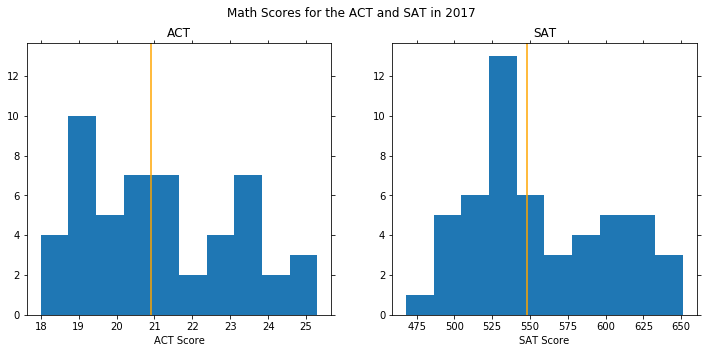

In [540]:
cols = ['act17_math', 'sat17_math']
titles = ['ACT', 'SAT']
xlabels = ['ACT Score','SAT Score']
subplot_histograms(st, cols, titles, xlabels)
ax = plt.suptitle('Math Scores for the ACT and SAT in 2017');

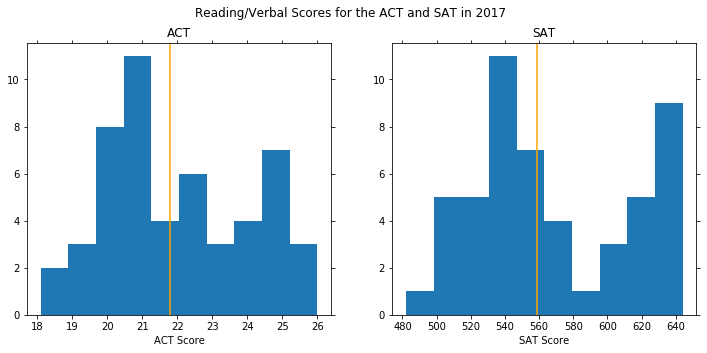

In [542]:
cols = ['act17_reading', 'sat17_ebrw']
titles = ['ACT', 'SAT']
xlabels = ['ACT Score','SAT Score']
subplot_histograms(st, cols, titles, xlabels)
ax = plt.suptitle('Reading/Verbal Scores for the ACT and SAT in 2017');

**The median is shown in the plots above. It's hard to make a comparison of the two and say anything meaningful since the tests are scored on a completely different scale**

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'SAT Math Scores are Negatively Correlated with ACT Math Scores')

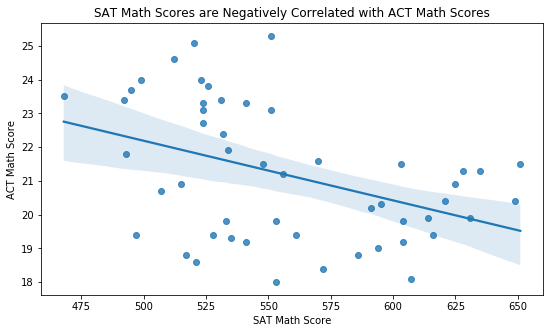

In [576]:
plt.figure(figsize = (9,5))
fig = sns.regplot(x = 'sat17_math', y = 'act17_math', data = st)
plt.xlabel('SAT Math Score')
plt.ylabel('ACT Math Score')
plt.title('SAT Math Scores are Negatively Correlated with ACT Math Scores')

**SAT math scores are negatively correlated with ACE math scores. The shaded area represents the 95% confidence interval. It would make sense that there is a negative correlation since most states tend to favor one test or the other. When the participation level for one test is low, the median score for that test tends to be higher than average.**

Text(0.5, 1.0, 'SAT Evidence-Based Reading and Writing Scores are Negatively Correlated with ACT Reading Scores')

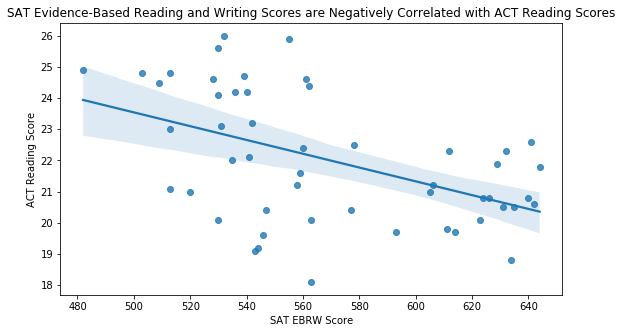

In [575]:
plt.figure(figsize = (9,5))
fig = sns.regplot(x = 'sat17_ebrw', y = 'act17_reading', data = st)
plt.xlabel('SAT EBRW Score')
plt.ylabel('ACT Reading Score')
plt.title('SAT Evidence-Based Reading and Writing Scores are Negatively Correlated with ACT Reading Scores')

**ACT reading scores are negatively correlated with SAT evidence-based reading and writing scores for the same reason as ACT math and SAT math scores**

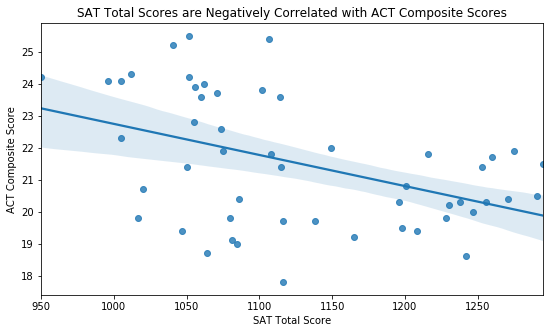

In [578]:
plt.figure(figsize = (9,5))
fig = sns.regplot(x = 'sat17_total', y = 'act17_composite', data = st)
plt.xlabel('SAT Total Score')
plt.ylabel('ACT Composite Score')
plt.title('SAT Total Scores are Negatively Correlated with ACT Composite Scores');

Text(0.5, 1.0, 'There is a near-perfect positive correlation between 2017 and 2018 ACT Composite Scores')

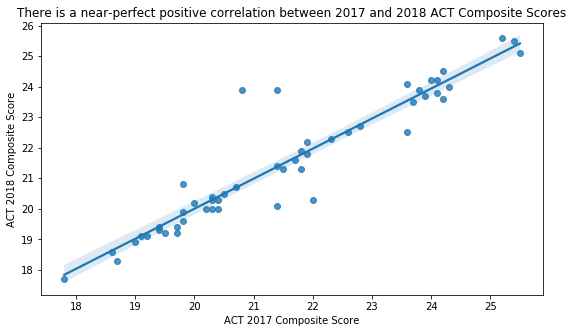

In [580]:
plt.figure(figsize = (9,5))
fig = sns.regplot(x = 'act17_composite', y = 'act18_composite', data = st)
plt.xlabel('ACT 2017 Composite Score')
plt.ylabel('ACT 2018 Composite Score')
plt.title('There is a near-perfect positive correlation between 2017 and 2018 ACT Composite Scores');

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

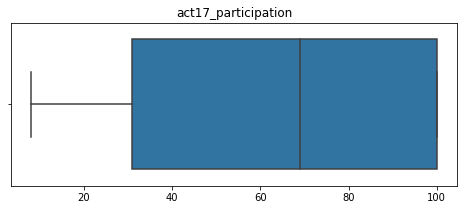

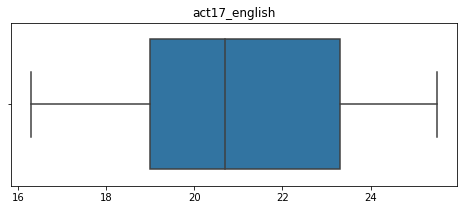

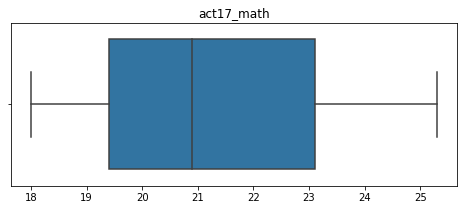

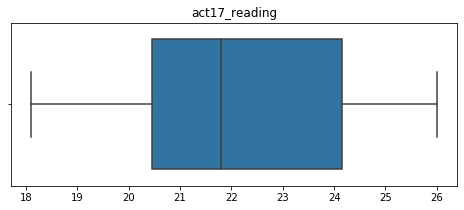

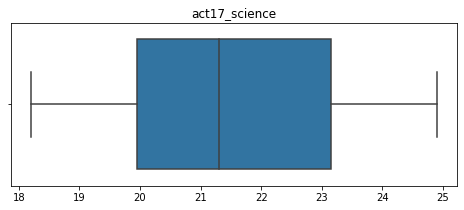

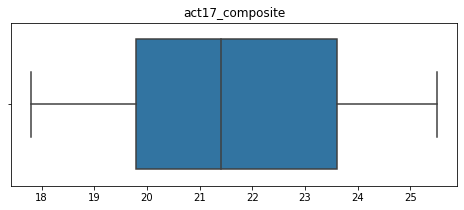

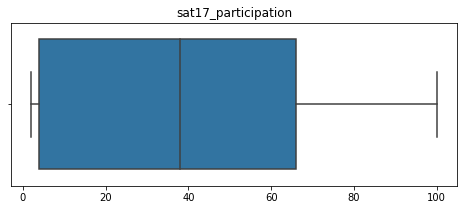

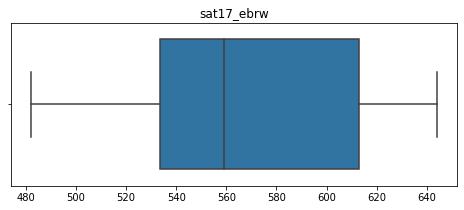

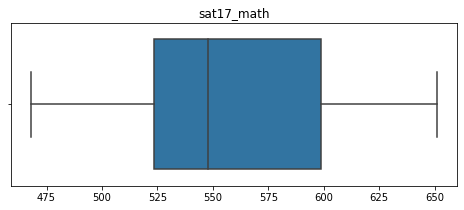

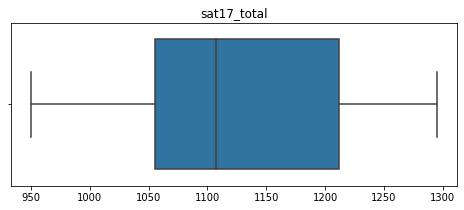

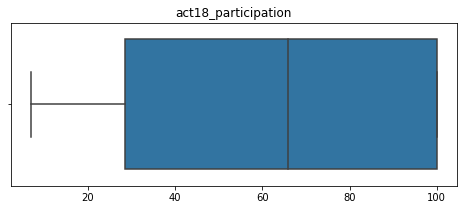

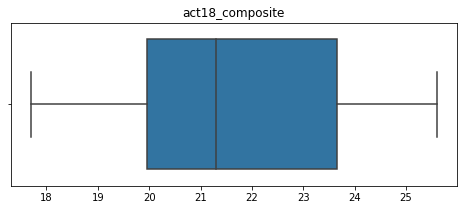

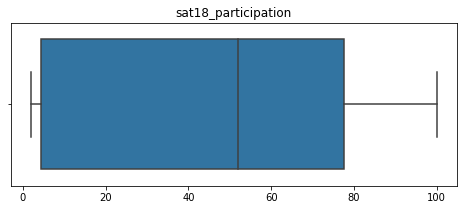

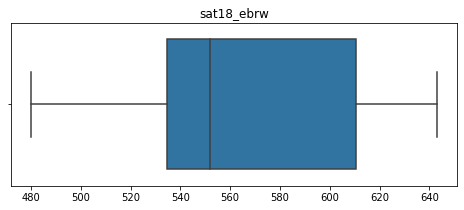

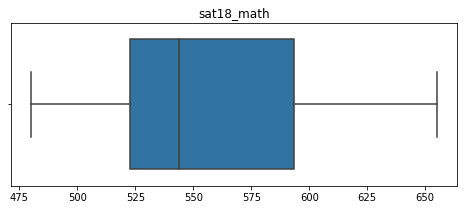

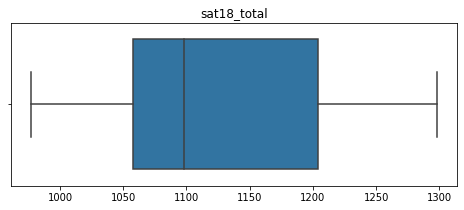

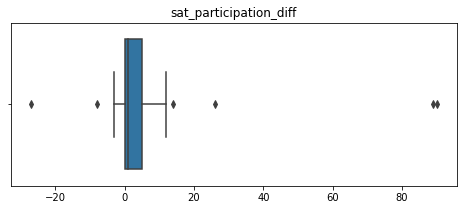

In [610]:
for column in list(st.columns)[1:]:
    plt.figure(figsize = (8,3))
    plt.title(column)
    sns.boxplot(x = column, data = st);
    plt.xlabel('')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [593]:
st['sat_participation_diff'] = st['sat18_participation'] - st['sat17_participation']

In [624]:
st[['state','sat_participation_diff','sat17_participation','act17_participation', 'sat18_total']].sort_values('sat_participation_diff', ascending = False).head()

,state,sat_participation_diff,sat17_participation,act17_participation,sat18_total
13,illinois,90,9,93,1019
5,colorado,89,11,100,1025
39,rhode island,26,71,21,1018
48,west virginia,14,14,69,999
30,new jersey,12,70,34,1094


**Illinois' participaation level shot up 90% from 2017 to 2018. Why? Colorado's participation level shot up by 89%.** 

In [623]:
st[['state','sat_participation_diff', 'sat17_participation','act17_participation','sat18_total']].sort_values('sat_participation_diff', ascending = False).tail()

,state,sat_participation_diff,sat17_participation,act17_participation,sat18_total
50,wyoming,0,3,100,1257
2,arizona,-1,30,62,1149
28,nevada,-3,26,100,1140
8,district of columbia,-8,100,32,977
9,florida,-27,83,73,1099


**SAT Participation levels in florida dropped by a whopping 27%**

In [604]:
st[['state','sat_participation_diff']].sort_values('sat_participation_diff', ascending = False).describe()

,sat_participation_diff
count,51.000000
mean,5.941176
std,18.271740
min,-27.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,90.000000


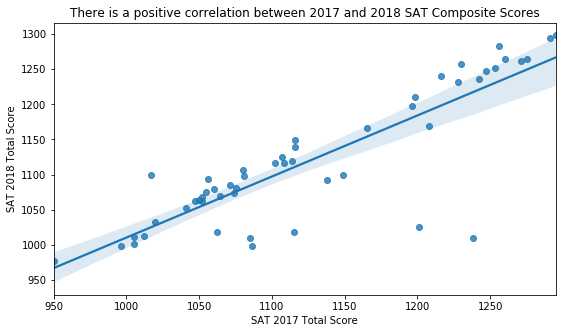

In [607]:
plt.figure(figsize = (9,5))
fig = sns.regplot(x = 'sat17_total', y = 'sat18_total', data = st)
plt.xlabel('SAT 2017 Total Score')
plt.ylabel('SAT 2018 Total Score')
plt.title('There is a positive correlation between 2017 and 2018 SAT Composite Scores');

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

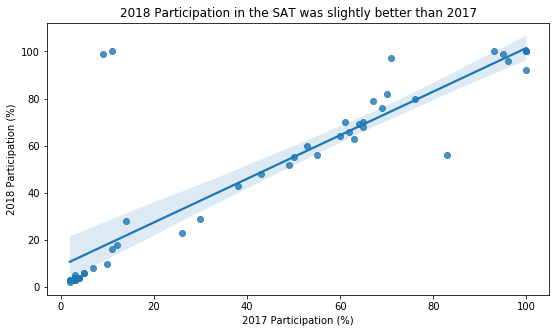

In [634]:
plt.figure(figsize = (9,5))
fig = sns.regplot(x = 'sat17_participation', y = 'sat18_participation', data = st)
plt.xlabel('2017 Participation (%)')
plt.ylabel('2018 Participation (%)')
plt.title('2018 Participation in the SAT was slightly better than 2017');

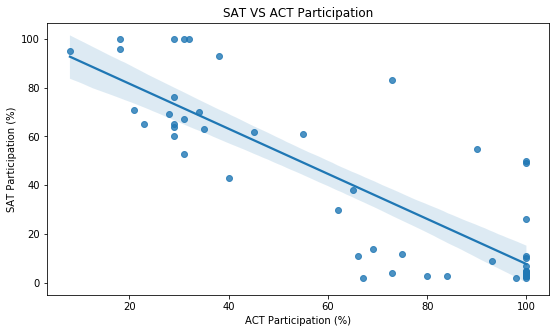

In [636]:
plt.figure(figsize = (9,5))
fig = sns.regplot(x = 'act17_participation', y = 'sat17_participation', data = st)
plt.xlabel('ACT Participation (%)')
plt.ylabel('SAT Participation (%)')
plt.title('SAT VS ACT Participation');

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Three states of particular interests are Illinois, Colorado, and Florida. All three states experienced a drastic change in participation levels from 2017 to 2018.** Upon Further research, I've discovered that the College Board, the company that administers the SAT, had won a contract with the Illinois board of education. The story can be found here: https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html. The SAT was essentially made mandatory in Illinois for high school students. The same thing happened in Colorado where the College Board negotiated a contract with the department of education (https://www.testive.com/colorado-sat-change-2017/#:~:text=On%20April%2011th%2C%202017%20all,a%20new%20four%20hour%20exam). I couldn't find anything on Florida. Some articles state that participation levels rose in 2018 from previous year, which conflicts with the data we have. It's possible that the participation number for florida is wrong. A list of states that require the SAT can be found here https://blog.prepscholar.com/which-states-require-the-sat.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: It does not seem to hold for any of the categories above. Varying sample sizes for each state might be to blame.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Probably not. The average of each score is most likely calculated from different sized populations. If we sample from our averages, we treat the scores from every state on equal footing. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No, because the scores are graded on a completely different scale. The format of the math section of both tests might be very different. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: